# <font color ="red">Problem Statement
    An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
    
    The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
    
    
    Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

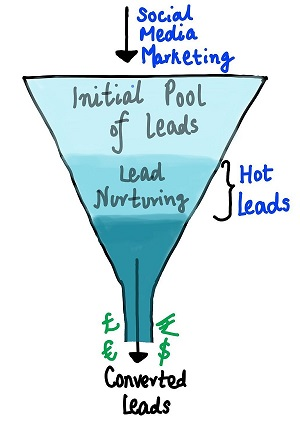

# About the Leads Data Set

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value

The `Leads.csv` data set contains the following features:

Variables	| Description
----------|---------------
**`Prospect ID`** | A unique ID with which the customer is identified.
**`Lead Number`** | A lead number assigned to each lead procured.
**`Lead Origin`** | The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
**`Do Not Email`** | An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
**`Do Not Call`** | An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
**`TotalVisits`** | The total number of visits made by the customer on the website.
**`Total Time Spent on Website`** | The total time spent by the customer on the website.
**`Page Views Per Visit`** | Average number of pages on the website viewed during the visits.
**`Last Activity`** | Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
**`Country`**	The country of the customer.
**`Specialization`** |	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
**`How did you hear about X Education`** | The source from which the customer heard about X Education.
**`What is your current occupation`** |	Indicates whether the customer is a student, umemployed or employed.
**`What matters most to you in choosing this course`** |	An option selected by the customer indicating what is their main motto behind doing this course.
**`Search`** |	An option selected by the customer indicating what is their main motto behind doing this course.
**`Magazine`** |	An option selected by the customer indicating what is their main motto behind doing this course.
**`Newspaper Article`** |	An option selected by the customer indicating what is their main motto behind doing this course.
**`X Education Forums`** |	An option selected by the customer indicating what is their main motto behind doing this course.
**`Newspaper`** |	An option selected by the customer indicating what is their main motto behind doing this course.
**`Digital Advertisement`** |	Indicating whether the customer had seen the ad in any of the listed items.
**`Through Recommendations`** |	Indicates whether the customer came in through recommendations.
**`Receive More Updates About Our Courses`** |	Indicates whether the customer chose to receive more updates about the courses.
**`Tags`** |	Tags assigned to customers indicating the current status of the lead.
**`Lead Quality`** |	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
**`Update me on Supply Chain Content`** |	Indicates whether the customer wants updates on the Supply Chain Content.
**`Get updates on DM Content`** |	Indicates whether the customer wants updates on the DM Content.
**`Lead Profile`** |	A lead level assigned to each customer based on their profile.
**`City`** |	The city of the customer.
**`Asymmetrique Activity Index`**	| An index and score assigned to each customer based on their activity and their profile
**`Asymmetrique Profile Index`** | An index and score assigned to each customer based on their activity and their profile
**`Asymmetrique Activity Score`** | An index and score assigned to each customer based on their activity and their profile
**`Asymmetrique Profile Score`** | An index and score assigned to each customer based on their activity and their profile
**`I agree to pay the amount through cheque`** |	Indicates whether the customer has agreed to pay the amount through cheque or not.
**`A free copy of Mastering The Interview`**	| Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
**`Last Notable Activity`** |	The last notable acitivity performed by the student.


**Note:**

The data set contains the following label (the value you will attempt to predict) :

Variables |  Description
----------|---------------
`Converted` | The target variable. Indicates whether a lead has been successfully converted or not.

# <font color='purple'>=============================================================

In [1]:
#importing Libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 120)

# Reading Data Set

In [2]:
# reading data
data = pd.read_csv("Leads.csv")
data1 = data


# <font color='purple'>=============================================================

# Data Quality Checks

In [3]:
print("Number of data points in data set", data.shape)
print('='*100)
print("\nThe attributes of data :", data.columns.values)
print('='*100)
data.head(2)

Number of data points in data set (9240, 37)

The attributes of data : ['Prospect ID' 'Lead Number' 'Lead Origin' 'Lead Source' 'Do Not Email'
 'Do Not Call' 'Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit' 'Last Activity' 'Country' 'Specialization'
 'How did you hear about X Education' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses' 'Tags' 'Lead Quality'
 'Update me on Supply Chain Content' 'Get updates on DM Content'
 'Lead Profile' 'City' 'Asymmetrique Activity Index'
 'Asymmetrique Profile Index' 'Asymmetrique Activity Score'
 'Asymmetrique Profile Score' 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview' 'Last Notable Activity']


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [4]:
#concise summary of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
#Descriptive statistics include those that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.

data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#checking for duplicate in data

data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

In [7]:
# function to find the percentage of missing values

def missing(data):
    return round(((data.isnull().sum())/(len(data)))*100, 2)

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value 

In [8]:
#replacing selected with null value since it is as good as a null value 

data = data.replace("Select",np.nan)

In [9]:
#checking for percentage of null values in data set

missing(data)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### <font color='green'>Observations:
   - **`How did you hear about X Education`** has the highest percentage of null values **78.46**

In [10]:
#dropping the columns where percentage of null values is greater than 45 percentage

column_with_nan = data.columns[data.isnull().any()]

for column in column_with_nan:
    if data[column].isnull().sum()*100/data.shape[0]>45:
        data.drop(column,1,inplace=True)
data.shape

(9240, 30)

In [11]:
#dropping the rows where null values in the columns for a row is greater or equal to 5

data = data[data.isnull().sum(axis=1)<=5]

In [12]:
#dimension of the data set

data.shape

(8366, 30)

# <font color='purple'>=============================================================

# Missing Value Imputation

In [13]:
#checking for percentage of null values in data set after dropping columns and rows 

missing(data)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.05
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.05
Last Activity                                     0.78
Country                                          18.97
Specialization                                   29.95
What is your current occupation                  22.21
What matters most to you in choosing a course    22.44
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# function to find the unique values and value count for a categorical variables 

def value_det(a):
    print(a.unique())
    print("="*100)
    print(a.value_counts(normalize = True))

# Categorical Variable analysis

In [15]:
#unique values in the feature
value_det(data["Lead Origin"])

['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Landing Page Submission    0.584031
API                        0.329190
Lead Add Form              0.080803
Lead Import                0.005857
Quick Add Form             0.000120
Name: Lead Origin, dtype: float64


In [16]:
#unique values in the feature
value_det(data["Lead Source"])

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' nan 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Google               0.344050
Direct Traffic       0.305062
Organic Search       0.138436
Olark Chat           0.111444
Reference            0.061180
Welingak Website     0.015595
Referral Sites       0.014995
Facebook             0.005878
bing                 0.000720
google               0.000600
Click2call           0.000480
Press_Release        0.000240
Live Chat            0.000240
Social Media         0.000240
testone              0.000120
NC_EDM               0.000120
WeLearn              0.000120
youtubechannel       0.000120
blog                 0.000120
welearnblog_Home     0.000120
Pay per Click Ads    0.000120
Name: Lead Source, dtype: float64


In [17]:
#unique values in the feature
value_det(data["Do Not Email"])

['No' 'Yes']
No     0.91836
Yes    0.08164
Name: Do Not Email, dtype: float64


### <font color='green'>Observations:
- **`Do Not Email`** categorical varible in the data set is `highly skewed`.

In [18]:
#unique values in the feature
value_det(data["Do Not Call"])

['No' 'Yes']
No     0.999761
Yes    0.000239
Name: Do Not Call, dtype: float64


### <font color='green'>Observations:
- **`Do Not Call`** categorical varible in the data set is `highly skewed`.

In [19]:
#unique values in the feature
value_det(data["Last Activity"])

['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Email Bounced' 'Email Link Clicked'
 'Form Submitted on Website' 'Unsubscribed' 'Olark Chat Conversation'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
Email Opened                    0.384773
SMS Sent                        0.321166
Page Visited on Website         0.075533
Olark Chat Conversation         0.066257
Converted to Lead               0.051560
Email Bounced                   0.035779
Email Link Clicked              0.026623
Form Submitted on Website       0.013974
Unreachable                     0.010963
Unsubscribed                    0.007228
Had a Phone Conversation        0.003614
Approached upfront              0.001084
View in browser link Clicked    0.000723
Email Marked Spam               0.000241
Email Received                  0.000241
Resubscribed

In [20]:
#unique values in the feature
value_det(data["Country"])

[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Nigeria                 0.000590
Kuwait                  0.000590
Canada                  0.000590
South Africa            0.

In [21]:
#unique values in the feature
value_det(data["Specialization"])

[nan 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Man

In [22]:
#unique values in the feature
value_det(data["What is your current occupation"])

['Unemployed' 'Student' nan 'Working Professional' 'Businessman' 'Other'
 'Housewife']
Unemployed              0.854179
Working Professional    0.108328
Student                 0.032268
Other                   0.002459
Housewife               0.001537
Businessman             0.001229
Name: What is your current occupation, dtype: float64


In [23]:
#unique values in the feature
value_det(data["Search"])

['No' 'Yes']
No     0.998327
Yes    0.001673
Name: Search, dtype: float64


### <font color='green'>Observations:
- **`Search`** varible in the data set is `highly skewed`.

In [24]:
#unique values in the feature
value_det(data["Magazine"])

['No']
No    1.0
Name: Magazine, dtype: float64


### <font color='green'>Observations:
- **`Magazine`** varible contain same value throughout the data set. 

In [25]:
#unique values in the feature
value_det(data["Newspaper Article"])

['No' 'Yes']
No     0.999761
Yes    0.000239
Name: Newspaper Article, dtype: float64


### <font color='green'>Observations:
- **`Newspaper Article`** varible in the data set is `highly skewed`.

In [26]:
#unique values in the feature
value_det(data["X Education Forums"])

['No' 'Yes']
No     0.99988
Yes    0.00012
Name: X Education Forums, dtype: float64


### <font color='green'>Observations:
- **`X Education Forums`** varible in the data set is `highly skewed`.

In [27]:
#unique values in the feature
value_det(data["Newspaper"])

['No' 'Yes']
No     0.99988
Yes    0.00012
Name: Newspaper, dtype: float64


### <font color='green'>Observations:
- **`Newspaper`** varible in the data set is `highly skewed`.

In [28]:
#unique values in the feature
value_det(data["Digital Advertisement"])

['No' 'Yes']
No     0.999522
Yes    0.000478
Name: Digital Advertisement, dtype: float64


### <font color='green'>Observations:
- **`Digital Advertisement`** varible in the data set is `highly skewed`.

In [29]:
#unique values in the feature
value_det(data["Through Recommendations"])

['No' 'Yes']
No     0.999163
Yes    0.000837
Name: Through Recommendations, dtype: float64


### <font color='green'>Observations:
- **`Through Recommendations`** varible in the data set is `highly skewed`.

In [30]:
#unique values in the feature
value_det(data["Receive More Updates About Our Courses"])

['No']
No    1.0
Name: Receive More Updates About Our Courses, dtype: float64


### <font color='green'>Observations:
- **`Receive More Updates About Our Courses`** varible contain same value throughout the data set.

In [31]:
#unique values in the feature
value_det(data["Tags"])

['Interested in other courses' 'Ringing'
 'Will revert after reading the email' nan 'Lost to EINS'
 'In confusion whether part time or DLP' 'Busy' 'switched off'
 'in touch with EINS' 'Already a student' 'Diploma holder (Not Eligible)'
 'Graduation in progress' 'Closed by Horizzon' 'number not provided'
 'opp hangup' 'Not doing further education' 'invalid number'
 'wrong number given' 'Interested  in full time MBA' 'Still Thinking'
 'Lost to Others' 'Shall take in the next coming month' 'Lateral student'
 'Interested in Next batch' 'Recognition issue (DEC approval)'
 'Want to take admission but has financial problems'
 'University not recognized']
Will revert after reading the email                  0.353082
Ringing                                              0.205225
Interested in other courses                          0.087588
Already a student                                    0.079392
Closed by Horizzon                                   0.056855
switched off                      

In [32]:
#unique values in the feature
value_det(data["Update me on Supply Chain Content"])

['No']
No    1.0
Name: Update me on Supply Chain Content, dtype: float64


### <font color='green'>Observations:
- **`Update me on Supply Chain Content`** varible contain same value throughout the data set.

In [33]:
#unique values in the feature
value_det(data["Get updates on DM Content"])

['No']
No    1.0
Name: Get updates on DM Content, dtype: float64


### <font color='green'>Observations:
- **`Get updates on DM Content`** varible contain same value throughout the data set.

In [34]:
#unique values in the feature
value_det(data["City"])

[nan 'Mumbai' 'Thane & Outskirts' 'Other Metro Cities' 'Other Cities'
 'Other Cities of Maharashtra' 'Tier II Cities']
Mumbai                         0.578437
Thane & Outskirts              0.135130
Other Cities                   0.123270
Other Cities of Maharashtra    0.081761
Other Metro Cities             0.068104
Tier II Cities                 0.013297
Name: City, dtype: float64


In [35]:
#unique values in the feature
value_det(data["I agree to pay the amount through cheque"])

['No']
No    1.0
Name: I agree to pay the amount through cheque, dtype: float64


### <font color='green'>Observations:
- **`I agree to pay the amount through cheque`** varible contain same value throughout the data set.

In [36]:
#unique values in the feature
value_det(data["A free copy of Mastering The Interview"])

['No' 'Yes']
No     0.654793
Yes    0.345207
Name: A free copy of Mastering The Interview, dtype: float64


In [37]:
#unique values in the feature
value_det(data["Last Notable Activity"])

['Modified' 'Email Opened' 'Page Visited on Website' 'Email Bounced'
 'Email Link Clicked' 'Unreachable' 'Unsubscribed'
 'Had a Phone Conversation' 'Olark Chat Conversation' 'SMS Sent'
 'Approached upfront' 'Resubscribed to emails'
 'View in browser link Clicked' 'Form Submitted on Website'
 'Email Received' 'Email Marked Spam']
Modified                        0.346283
Email Opened                    0.316041
SMS Sent                        0.254004
Page Visited on Website         0.036577
Email Link Clicked              0.016615
Olark Chat Conversation         0.011834
Email Bounced                   0.007052
Unsubscribed                    0.005498
Unreachable                     0.003586
Had a Phone Conversation        0.001673
Email Marked Spam               0.000239
View in browser link Clicked    0.000120
Resubscribed to emails          0.000120
Form Submitted on Website       0.000120
Approached upfront              0.000120
Email Received                  0.000120
Name: Last No

### Dropping the highly skewed columns

In [38]:
#dropping highly skewed columns from the data set since it will not help in model
data = data.drop(["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper",
                  "Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
                  "Update me on Supply Chain Content","Get updates on DM Content",
                  "I agree to pay the amount through cheque",],axis = 1)

In [39]:
#dimension of the data set after dropping highly skewed data
data.shape

(8366, 17)

# <font color='purple'>=============================================================

# Imputing Missing Values

In [40]:
data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,No,Email Opened


In [41]:
print(data["Lead Source"].unique())
print(" ")
print(data["Lead Source"].value_counts())
print("\nNull Count\n")
print(data["Lead Source"].isnull().sum())

['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' nan 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
 
Google               2868
Direct Traffic       2543
Organic Search       1154
Olark Chat            929
Reference             510
Welingak Website      130
Referral Sites        125
Facebook               49
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
NC_EDM                  1
WeLearn                 1
youtubechannel          1
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

Null Count

30


In [42]:
#function to check occurance of variables in a feature
def check(skew):
    barplot = skew.value_counts()
    k = pd.DataFrame(barplot)
    barplot.plot.bar()

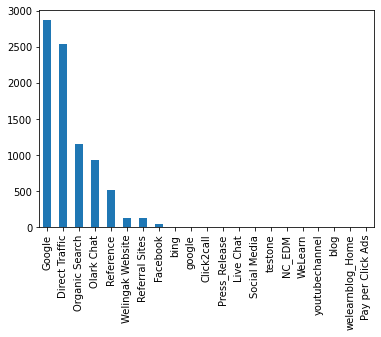

In [43]:
#checking data quality of a feature
check(data["Lead Source"])

In [44]:
#bucketing the categorical variable

data["Lead Source"].fillna("Google", inplace = True)
data["Lead Source"] = data["Lead Source"].replace("google","Google")
data["Lead Source"] = data["Lead Source"].replace("bing","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("Click2call","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("Live Chat","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("Press_Release","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("Social Media","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("testone","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("Pay per Click Ads","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("welearnblog_Home","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("NC_EDM","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("youtubechannel","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("WeLearn","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("blog","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("Facebook","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("Referral Sites","Other_Lead_Source")
data["Lead Source"] = data["Lead Source"].replace("Welingak Website","Other_Lead_Source")

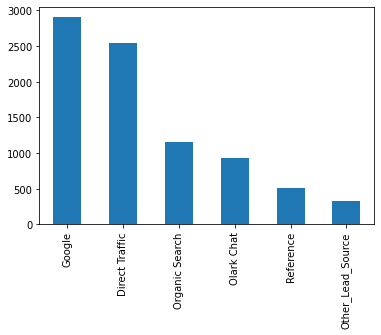

In [45]:
#checking data quality of a feature
check(data["Lead Source"])

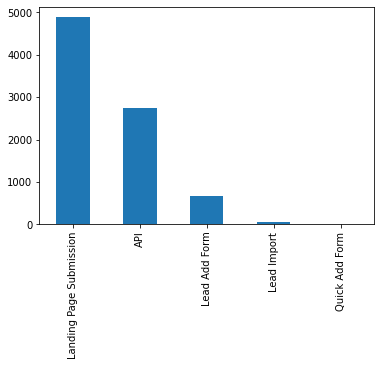

In [46]:
#checking data quality of a feature
check(data["Lead Origin"])

In [47]:
#bucketing the categorical variable
data["Lead Origin"] = data["Lead Origin"].replace("Quick Add Form","Other_Lead_Origin")
data["Lead Origin"] = data["Lead Origin"].replace("Lead Import","Other_Lead_Origin")
data["Lead Origin"] = data["Lead Origin"].replace("Lead Add Form","Other_Lead_Origin")

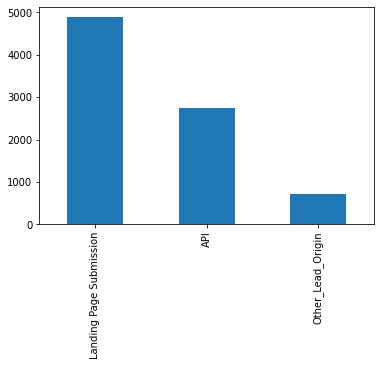

In [48]:
#checking data quality of a feature
check(data["Lead Origin"])

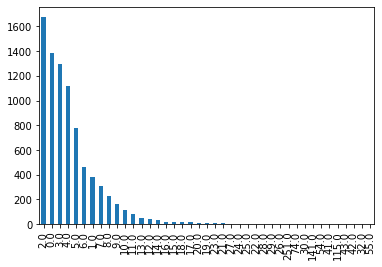

In [49]:
#checking data quality of a feature
check(data["TotalVisits"])

In [50]:
#print("TotalVisits mean value:",data["TotalVisits"].mean())
#print("TotalVisits mode value:",data["TotalVisits"].mode())
#print("TotalVisits median value: ",data["TotalVisits"].median())

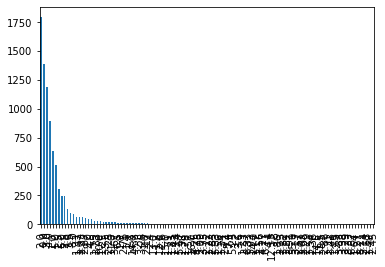

In [51]:
#checking data quality of a feature
check(data["Page Views Per Visit"])

In [52]:
#print("Page Views Per Visit mean value:",data["Page Views Per Visit"].mean())
#print("Page Views Per Visit mode value:",data["Page Views Per Visit"].mode())
#print("Page Views Per Visit median value: ",data["Page Views Per Visit"].median())

In [53]:
#imputing missing value
data["TotalVisits"] = data["TotalVisits"].replace(np.NaN,data["TotalVisits"].median())
data["Page Views Per Visit"] = data["Page Views Per Visit"].replace(np.NaN,data["Page Views Per Visit"].median())
data["What is your current occupation"] = data["What is your current occupation"].replace(np.NaN,"Not Mentioned")

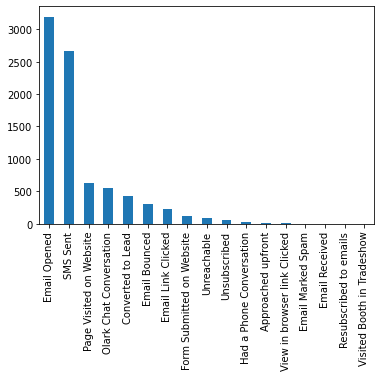

In [54]:
#checking data quality of a feature
check(data["Last Activity"])

In [55]:
#bucketing the categorical variable

data["Last Activity"] = data["Last Activity"].replace("Approached upfront","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("View in browser link Clicked","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Email Received","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Email Marked Spam","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Visited Booth in Tradeshow","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Resubscribed to emails","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Email Link Clicked","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Form Submitted on Website","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Unreachable","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Unsubscribed","Other_Last_Activity")
data["Last Activity"] = data["Last Activity"].replace("Had a Phone Conversation","Other_Last_Activity")

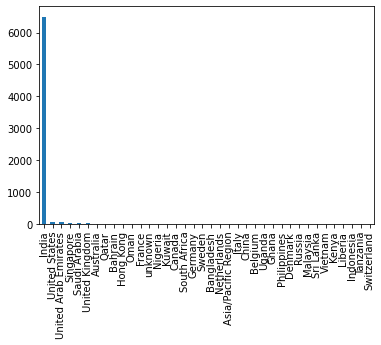

In [56]:
#checking data quality of a feature
check(data["Country"])

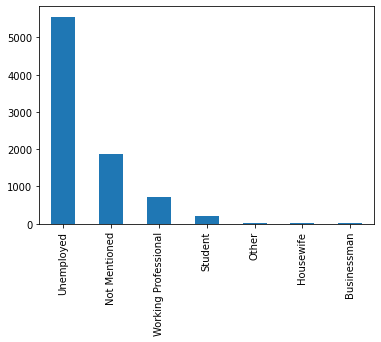

In [57]:
#checking data quality of a feature
check(data["What is your current occupation"])

In [58]:
#bucketing the categorical variable

data["What is your current occupation"] = data["What is your current occupation"].replace("Other","Other_occupations")
data["What is your current occupation"] = data["What is your current occupation"].replace("Housewife","Other_occupations")
data["What is your current occupation"] = data["What is your current occupation"].replace("Businessman","Other_occupations")
data["What is your current occupation"] = data["What is your current occupation"].replace("Housewife","Other_occupations")
data["What is your current occupation"] = data["What is your current occupation"].replace("Student","Other_occupations")
data["What is your current occupation"] = data["What is your current occupation"].replace("Working Professional","Other_occupations")

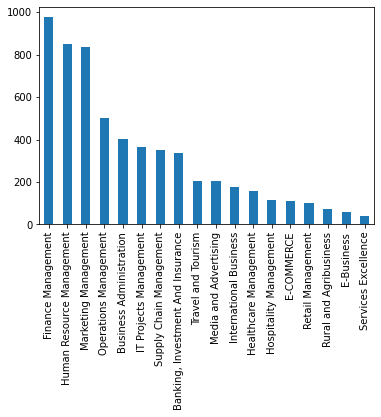

In [59]:
#checking data quality of a feature
check(data["Specialization"])

In [60]:
data["Specialization"] = data["Specialization"].replace(np.NaN,"Not Selected")

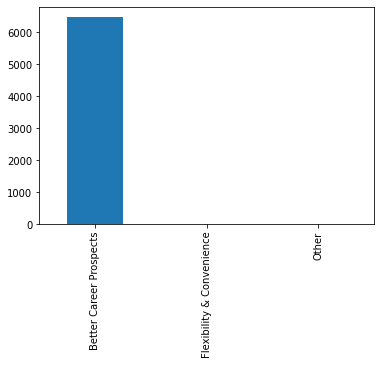

In [61]:
#checking data quality of a feature
check(data["What matters most to you in choosing a course"])

In [62]:
#bucketing the categorical variable

data["What matters most to you in choosing a course"] = data["What matters most to you in choosing a course"].replace(np.nan,"matter_choosing_course_other")
data["What matters most to you in choosing a course"] = data["What matters most to you in choosing a course"].replace("Flexibility & Convenience","matter_choosing_course_other")
data["What matters most to you in choosing a course"] = data["What matters most to you in choosing a course"].replace("Other","matter_choosing_course_other")

### <font color='green'>Observations:

- <font color='red'>`Tags` Column seems to be remarks created and updated by the Sales team, therefore the `Tags` Column can be dropped.
- <font color='red'>`Prospect ID` and `Lead Number` Columns provide information that will help in building the model.
- <font color='red'>Since **X Education** sells **online courses** to industry professionals, The `Country` and `City` won't provide any useful information, that can help in building the model to identify the leads.


In [63]:
#dropping not important columns from the data
data.drop(["Prospect ID","Lead Number","Tags","Country","City"], axis = 1, inplace = True)

# <font color='purple'>=============================================================

# Checking for Outliers and Treating Outliers

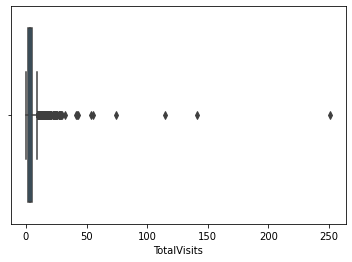

In [64]:
# checking for outliers in "TotalVisits" using boxplot

sns.boxplot(data["TotalVisits"])

In [65]:
#capping the outliers
Q1 = data["TotalVisits"].quantile(0.001)
Q2 = data["TotalVisits"].quantile(0.999)
data["TotalVisits"][data["TotalVisits"]<=Q1]=Q1
data["TotalVisits"][data["TotalVisits"]>=Q2]=Q2

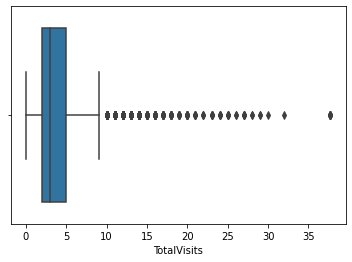

In [66]:
# checking for outliers in "TotalVisits" after outlier treatment using boxplot

sns.boxplot(data["TotalVisits"])

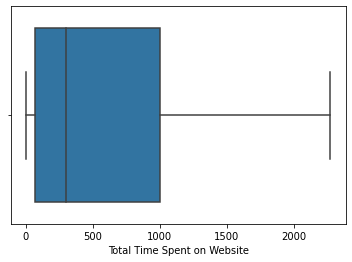

In [67]:
# checking for outliers in "Total Time Spent on Website" using boxplot

sns.boxplot(data["Total Time Spent on Website"])

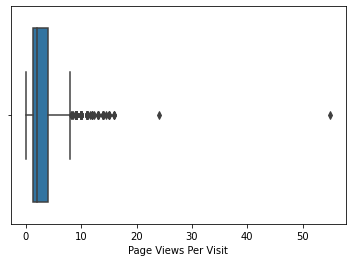

In [68]:
# checking for outliers in "Page Views Per Visit" using boxplot

sns.boxplot(data["Page Views Per Visit"])

In [69]:
#capping the outliers

Q3 = data["Page Views Per Visit"].quantile(0.001)
Q4 = data["Page Views Per Visit"].quantile(0.999)
data["Page Views Per Visit"][data["Page Views Per Visit"]<=Q3]=Q3
data["Page Views Per Visit"][data["Page Views Per Visit"]>=Q4]=Q4

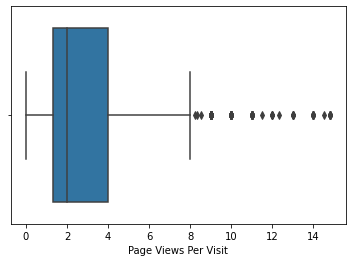

In [70]:
# checking for outliers in "Page Views Per Visit" after outlier treatment using boxplot

sns.boxplot(data["Page Views Per Visit"])

# <font color='purple'>=============================================================

# Exploratory Data Analysis

Converted : 3466 , ( 41.429595983743724 %)
Not Converted : 4900 , ( 58.57040401625627 %)


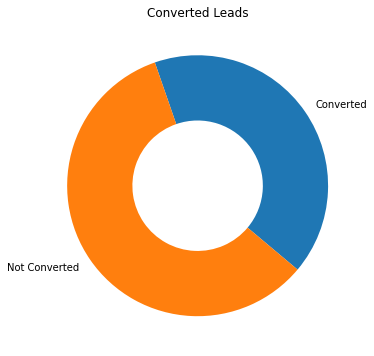



Converted : 3561 , ( 38.53896103896104 %)
Not Converted : 5679 , ( 61.46103896103896 %)


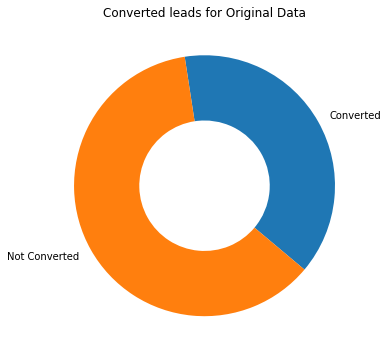

In [71]:
#Checking data quality
converted_counts = data["Converted"].value_counts()

print("Converted :", converted_counts[1], ", (", (converted_counts[1]/(converted_counts[1]+converted_counts[0]))*100,"%)")
print("Not Converted :", converted_counts[0], ", (", (converted_counts[0]/(converted_counts[1]+converted_counts[0]))*100,"%)")

print("="*100)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Converted", "Not Converted"]
conv = [converted_counts[1], converted_counts[0]]
plt.pie(conv, wedgeprops=dict(width=0.5), startangle=-40,labels = recipe)
plt.title("Converted Leads")
plt.show()

print("="*100)
print("="*100)
print("\n")
converted_counts1 = data1["Converted"].value_counts()
print("Converted :", converted_counts1[1], ", (", (converted_counts1[1]/(converted_counts1[1]+converted_counts1[0]))*100,"%)")
print("Not Converted :", converted_counts1[0], ", (", (converted_counts1[0]/(converted_counts1[1]+converted_counts1[0]))*100,"%)")
print("="*100)
fig1, a1x = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe1 = ["Converted", "Not Converted"]
conv1 = [converted_counts1[1], converted_counts1[0]]
plt.pie(conv1, wedgeprops=dict(width=0.5), startangle=-40,labels = recipe)
plt.title("Converted leads for Original Data")
plt.show()

### <font color='green'>Observations:
    
- Data set is **Imbalanced**
- After dropping the rows where missing values for column in a row was greater than or equal to 5 were mostly of the leads that didn't converted

# <font color='purple'>=============================================================

# Univariate Analysis

In [72]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='Converted', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Leads')
    plt.title('Converted')
    plt.xticks(ind, list(data[xtick].values))
    plt.xticks(rotation=90)
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()
    print("="*100)
    print("\nObservations:")

In [73]:
def univariate_barplots(data, col1, col2='Converted', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    if len(temp) > 5:
        print(temp.tail(5))

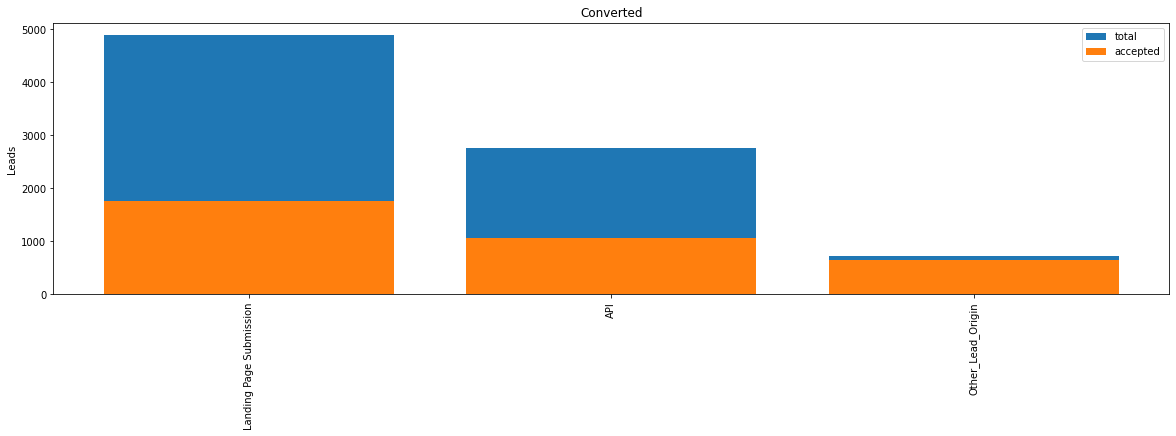


Observations:
               Lead Origin  Converted  total       Avg
1  Landing Page Submission       1768   4886  0.361850
0                      API       1057   2754  0.383805
2        Other_Lead_Origin        641    726  0.882920


In [74]:
#Analysis of "Lead Origin" variable
univariate_barplots(data, "Lead Origin", "Converted", False)

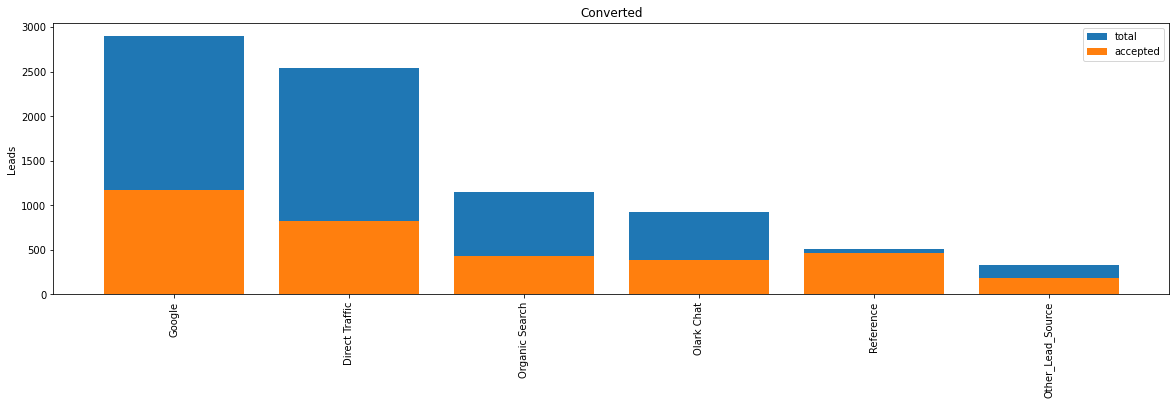


Observations:
      Lead Source  Converted  total       Avg
1          Google       1174   2903  0.404409
0  Direct Traffic        818   2543  0.321667
3  Organic Search        436   1154  0.377816
2      Olark Chat        390    929  0.419806
5       Reference        467    510  0.915686
         Lead Source  Converted  total       Avg
0     Direct Traffic        818   2543  0.321667
3     Organic Search        436   1154  0.377816
2         Olark Chat        390    929  0.419806
5          Reference        467    510  0.915686
4  Other_Lead_Source        181    327  0.553517


In [75]:
#Analysis of "Lead Source" variable
univariate_barplots(data, "Lead Source", "Converted", False)

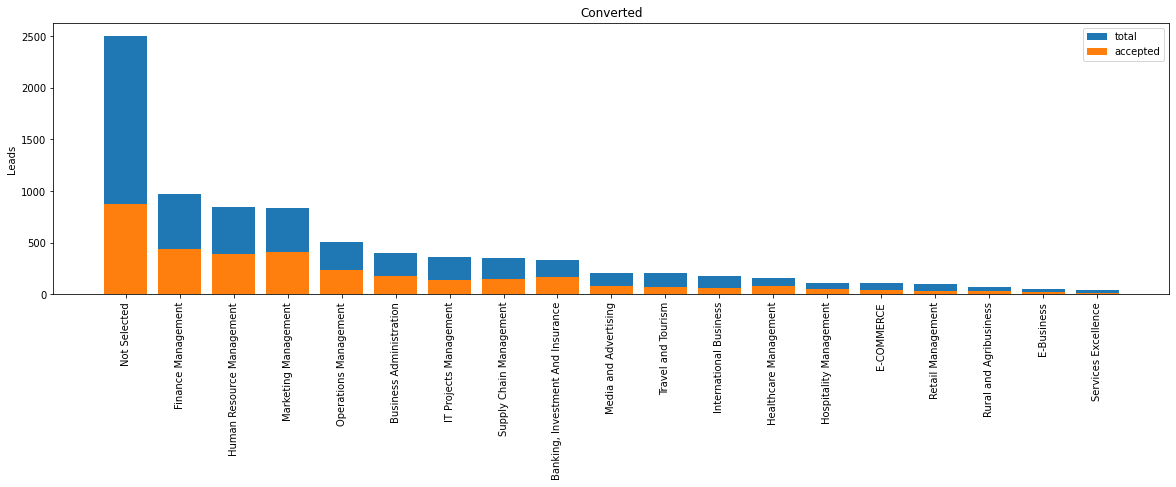


Observations:
               Specialization  Converted  total       Avg
12               Not Selected        874   2506  0.348763
4          Finance Management        436    976  0.446721
7   Human Resource Management        388    848  0.457547
10       Marketing Management        408    838  0.486874
13      Operations Management        238    503  0.473161
            Specialization  Converted  total       Avg
3               E-COMMERCE         40    112  0.357143
14       Retail Management         34    100  0.340000
15  Rural and Agribusiness         31     73  0.424658
2               E-Business         21     57  0.368421
16     Services Excellence         11     40  0.275000


In [76]:
#Analysis of "Specialization" variable
univariate_barplots(data, "Specialization", "Converted", False)

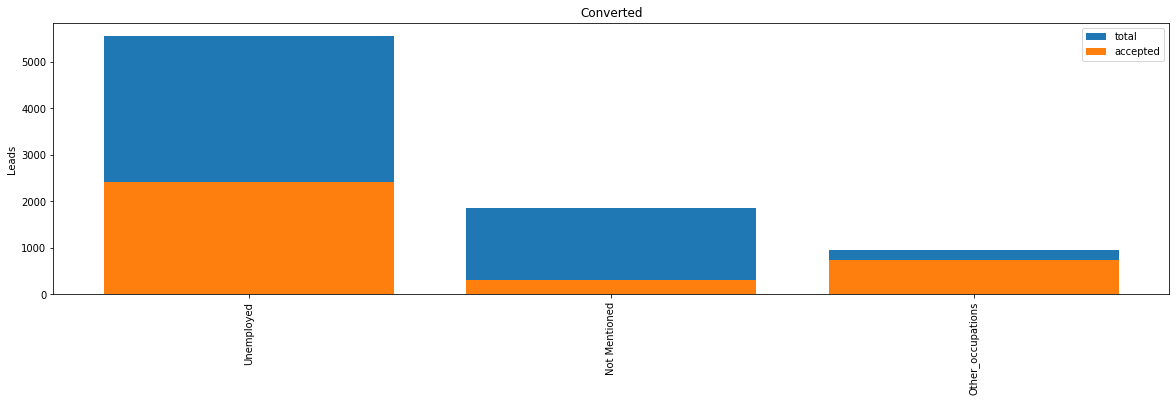


Observations:
  What is your current occupation  Converted  total       Avg
2                      Unemployed       2405   5559  0.432632
0                   Not Mentioned        312   1858  0.167922
1               Other_occupations        749    949  0.789252


In [77]:
#Analysis of "What is your current occupation" variable
univariate_barplots(data, "What is your current occupation", "Converted", False)

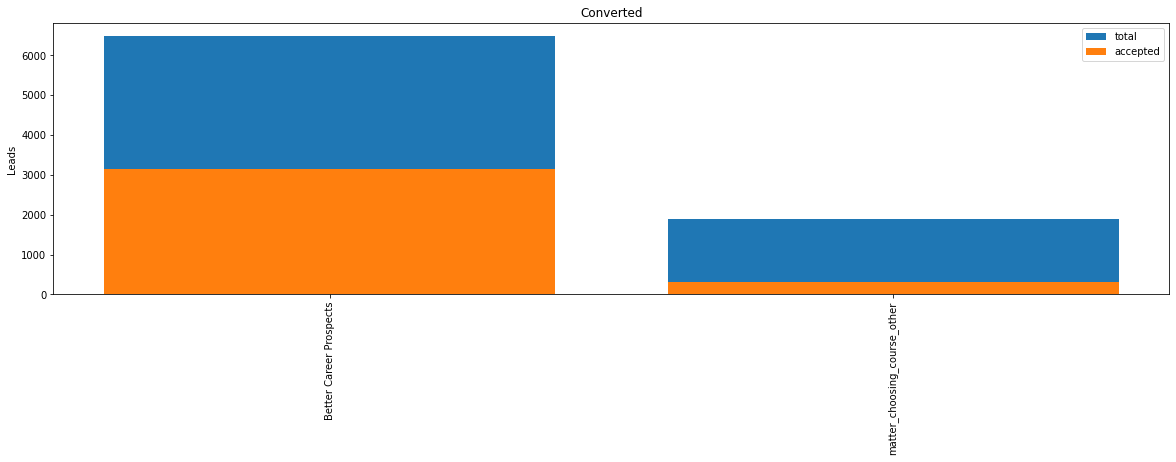


Observations:
  What matters most to you in choosing a course  Converted  total       Avg
0                       Better Career Prospects       3153   6486  0.486124
1                  matter_choosing_course_other        313   1880  0.166489


In [78]:
#Analysis of "What matters most to you in choosing a course" variables
univariate_barplots(data, "What matters most to you in choosing a course", "Converted", False)

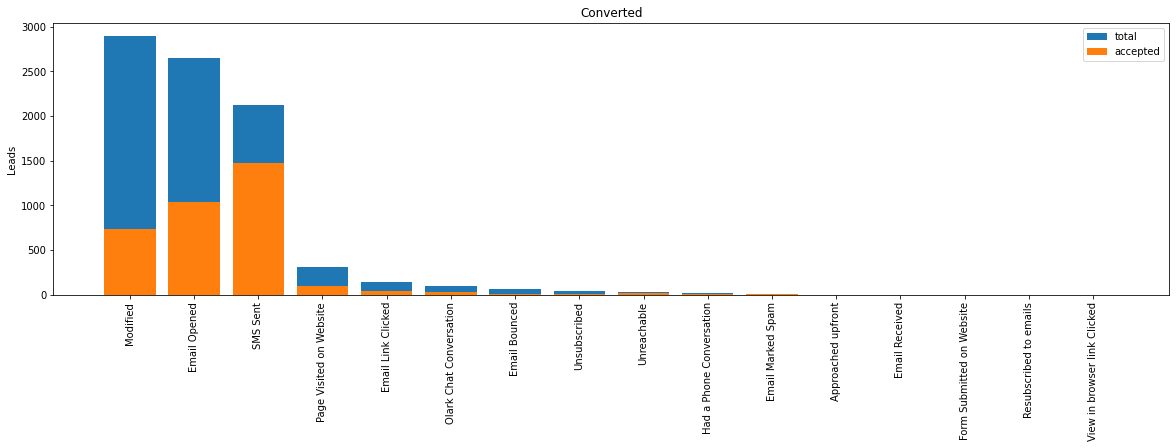


Observations:
      Last Notable Activity  Converted  total       Avg
8                  Modified        733   2897  0.253020
4              Email Opened       1034   2644  0.391074
12                 SMS Sent       1474   2125  0.693647
10  Page Visited on Website         93    306  0.303922
2        Email Link Clicked         45    139  0.323741
           Last Notable Activity  Converted  total  Avg
0             Approached upfront          1      1  1.0
5                 Email Received          1      1  1.0
6      Form Submitted on Website          0      1  0.0
11        Resubscribed to emails          1      1  1.0
15  View in browser link Clicked          0      1  0.0
 
Number of null values : 0


In [79]:
#Analysis of "Last Notable Activity"
univariate_barplots(data, "Last Notable Activity", "Converted", False)
print(" ")
print("Number of null values :",data["Last Notable Activity"].isnull().sum())

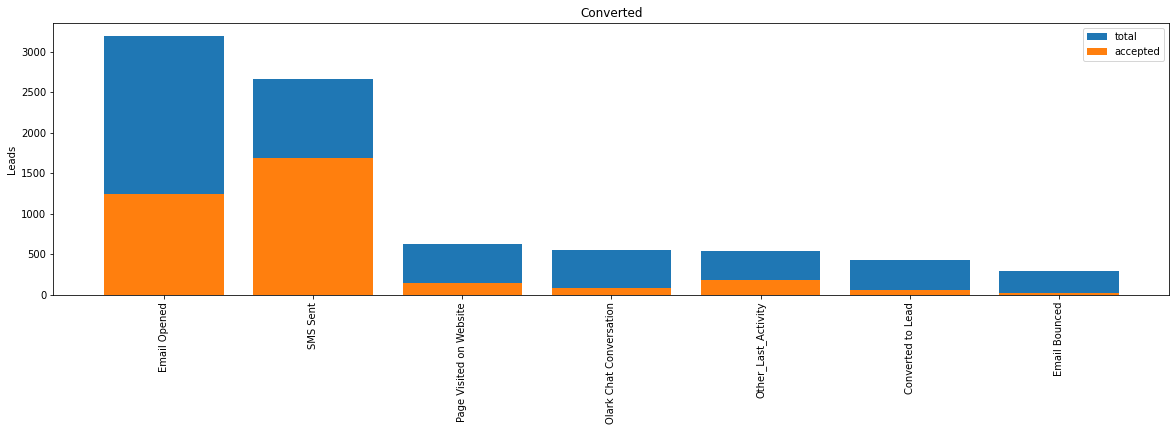


Observations:
             Last Activity  Converted  total       Avg
2             Email Opened       1241   3194  0.388541
6                 SMS Sent       1687   2666  0.632783
5  Page Visited on Website        150    627  0.239234
3  Olark Chat Conversation         80    550  0.145455
4      Other_Last_Activity        184    539  0.341373
             Last Activity  Converted  total       Avg
5  Page Visited on Website        150    627  0.239234
3  Olark Chat Conversation         80    550  0.145455
4      Other_Last_Activity        184    539  0.341373
0        Converted to Lead         54    428  0.126168
1            Email Bounced         25    297  0.084175
 
Number of null values : 65


In [80]:
#Analysis of "Last Activity"
univariate_barplots(data, "Last Activity", "Converted", False)
print(" ")
print("Number of null values :",data["Last Activity"].isnull().sum())

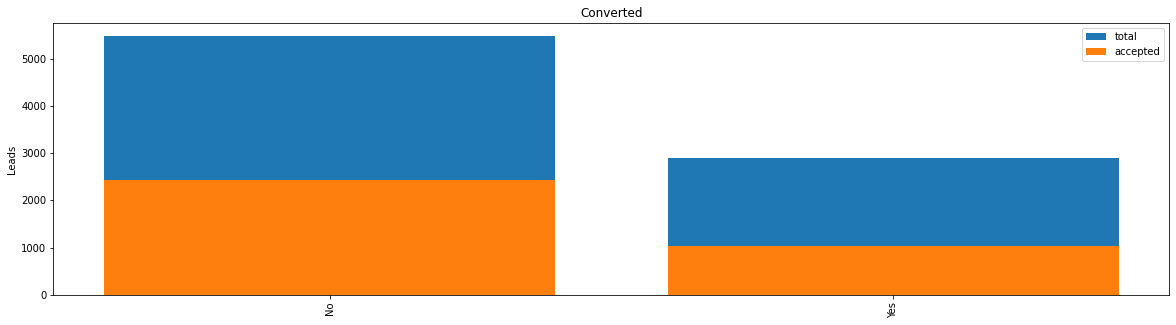


Observations:
  A free copy of Mastering The Interview  Converted  total       Avg
0                                     No       2436   5478  0.444688
1                                    Yes       1030   2888  0.356648
 
Number of null values : 0


In [81]:
univariate_barplots(data, "A free copy of Mastering The Interview", "Converted", False)
print(" ")
print("Number of null values :",data["A free copy of Mastering The Interview"].isnull().sum())

# <font color='purple'>=============================================================

# Bivariate Analysis

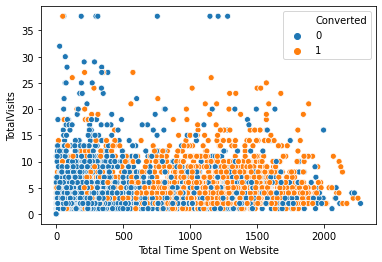

In [82]:
#scatter plot between "Total Time Spent on Website" and "TotalVisits"
sns.scatterplot(x= "Total Time Spent on Website",y = "TotalVisits", hue= "Converted", data = data)

### <font color='green'>Observations:

- more the time spend on the website by Coustomer in the less visits the more are the chances that they will be Converted

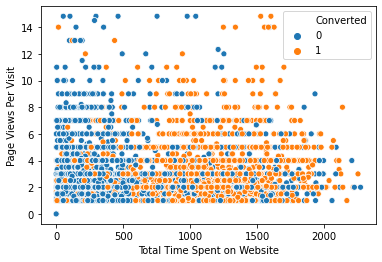

In [83]:
#scatter plot between "Total Time Spent on Website" and "Page Views Per Visit"
sns.scatterplot(x= "Total Time Spent on Website",y = "Page Views Per Visit", hue= "Converted", data = data)

### <font color='green'>Observations:

- more the time spend on the pages during the leads visits, more are the chances of the conversion

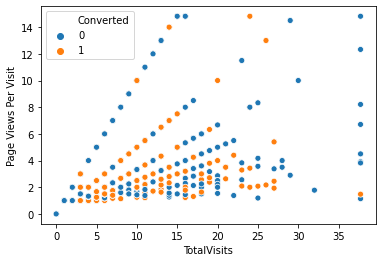

In [84]:
#scatter plot between "TotalVisits" and "Page Views Per Visit"
sns.scatterplot(x= "TotalVisits",y = "Page Views Per Visit", hue= "Converted", data = data)

### <font color='green'>Observations:

- the plot provide nut much information on Conversion of leads

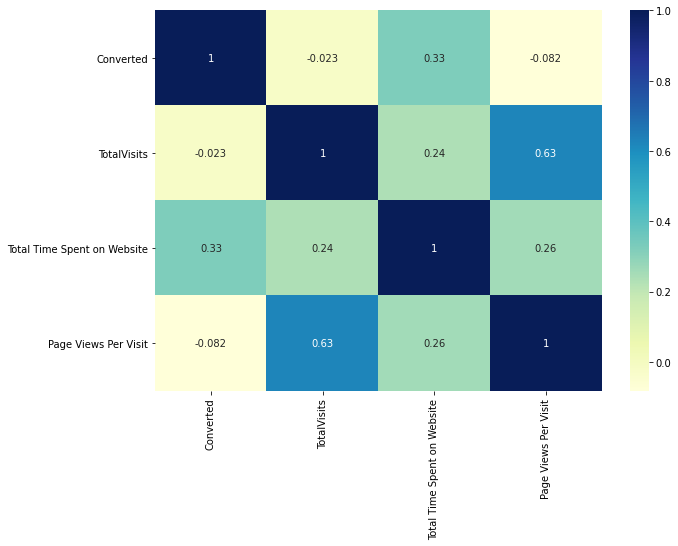

In [85]:
#heat map for the numerical variables in the data sets
plt.figure(figsize = (10, 7))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

## <font color='green'>Observations:
- `Page Views Per Visit` and `TotalVisits`have highest Correlation : **0.63**

# <font color='purple'>=============================================================

# Make Data Model Ready: encoding numerical, categorical features

In [86]:
data.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Selected,Unemployed,Better Career Prospects,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Selected,Unemployed,Better Career Prospects,No,Email Opened


In [87]:
# Get the dummy variables for the feature "Lead Origin","Specialization","Lead Source","Last Activity",
#"What is your current occupation","What matters most to you in choosing a course","Last Notable Activity"

lead_origin = pd.get_dummies(data["Lead Origin"],drop_first=True)

lead_source = pd.get_dummies(data["Lead Source"],drop_first=True)

last_activity = pd.get_dummies(data["Last Activity"],prefix='Last_Activity',drop_first=True)

specialization = pd.get_dummies(data["Specialization"],drop_first=True)

current_occupation = pd.get_dummies(data["What is your current occupation"],drop_first=True)

choosing_course = pd.get_dummies(data["What matters most to you in choosing a course"],drop_first=True)

last_notable_activity = pd.get_dummies(data["Last Notable Activity"],prefix='Last_Notable_Activity',drop_first=True)

In [88]:
#mapping the variables
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [89]:
#mapping the "A free copy of Mastering The Interview"
data["A free copy of Mastering The Interview"] = binary_map(data["A free copy of Mastering The Interview"])

### <font color='orange'>Drop the Categorical variables for which dummies have been created

In [90]:
data.drop(["Lead Origin","Specialization","Lead Source","Last Activity","What is your current occupation","What matters most to you in choosing a course","Last Notable Activity"],axis = 1,inplace = True)

In [91]:
# Add the dummies created to the original dataframe
data = pd.concat([data,lead_origin,lead_source,last_activity,specialization,current_occupation,choosing_course,last_notable_activity], axis=1)

### Dividing into X and Y sets for the model building

In [92]:
#Dividing into X and Y sets for the model building

y = data["Converted"]
X = data.drop(["Converted"], axis = 1)

# <font color='purple'>=============================================================

# Splitting the Data into Train and Test Data Sets

In [93]:
# import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 100)

## Numerical features

### Scaling the Numerical Variables

In [94]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [95]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [96]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Other_Lead_Origin,Google,Olark Chat,Organic Search,Other_Lead_Source,Reference,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Other_Last_Activity,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Not Selected,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Other_occupations,Unemployed,matter_choosing_course_other,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
8859,0.357768,1.216927,1.201638,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6588,-0.482959,-0.314179,-0.285225,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
346,0.077526,-0.535762,0.706017,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4976,-0.202717,1.378574,0.210396,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2084,-1.043444,-0.966216,-1.276467,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## <font color='green'>Observations:

- plot is too tight to make any analysis

# <font color='purple'>=============================================================

# Applying Logistic Regression on Train Data Set

In [97]:
# Importing RFE and LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(lr,20)             # running RFE with 20 variables
rfe = rfe.fit(X_train, y_train)

In [98]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False, False])

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('A free copy of Mastering The Interview', False, 22),
 ('Landing Page Submission', True, 1),
 ('Other_Lead_Origin', True, 1),
 ('Google', True, 1),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 2),
 ('Other_Lead_Source', False, 24),
 ('Reference', True, 1),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Other_Last_Activity', False, 4),
 ('Last_Activity_Page Visited on Website', False, 8),
 ('Last_Activity_SMS Sent', True, 1),
 ('Business Administration', False, 30),
 ('E-Business', False, 21),
 ('E-COMMERCE', False, 5),
 ('Finance Management', False, 33),
 ('Healthcare Management', False, 10),
 ('Hospitality Management', True, 1),
 ('Human Resource Management', False, 16),
 ('IT Projects Management', False, 28),
 ('International Business', False, 14),
 ('Marketin

In [100]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Landing Page Submission',
       'Other_Lead_Origin', 'Google', 'Olark Chat', 'Reference',
       'Last_Activity_Email Bounced', 'Last_Activity_Email Opened',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Hospitality Management', 'Not Selected', 'Retail Management',
       'Other_occupations', 'Unemployed', 'matter_choosing_course_other',
       'Last_Notable_Activity_Email Opened',
       'Last_Notable_Activity_Had a Phone Conversation',
       'Last_Notable_Activity_Modified', 'Last_Notable_Activity_Unreachable'],
      dtype='object')

In [101]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Organic Search',
       'Other_Lead_Source', 'Last_Activity_Other_Last_Activity',
       'Last_Activity_Page Visited on Website', 'Business Administration',
       'E-Business', 'E-COMMERCE', 'Finance Management',
       'Healthcare Management', 'Human Resource Management',
       'IT Projects Management', 'International Business',
       'Marketing Management', 'Media and Advertising',
       'Operations Management', 'Rural and Agribusiness',
       'Services Excellence', 'Supply Chain Management', 'Travel and Tourism',
       'Last_Notable_Activity_Email Bounced',
       'Last_Notable_Activity_Email Link Clicked',
       'Last_Notable_Activity_Email Marked Spam',
       'Last_Notable_Activity_Email Received',
       'Last_Notable_Activity_Form Submitted on Website',
       'Last_Notable_Activity_Olark Chat Conversation',
       'Last_Notable_Activity_Page Visited on Website',
       'Last_

In [102]:
import statsmodels
import statsmodels.api as sm

In [103]:
# Creating X_train dataframe with RFE selected variables
# Adding a constant variable
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5856
Model:                            GLM   Df Residuals:                     5835
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.5
Date:                Mon, 01 Jun 2020   Deviance:                       5093.0
Time:                        22:07:17   Pearson chi2:                 5.75e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             21.8892    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
Total Time Spent on Website                        1.0401      0.040     26.014      0.000       0.962       1.118
Landing Page Submission                           -0.7923      0.129     -6.162      0.000      -1.044      -0.540
Other_Lead_Origin                                  2.8055      0.241     11.654      0.000       2.334       3.277
Google                                             0.2777      0.080      3.453      0.001       0.120       0.435
Olark Chat                                         1.3160      0.142      9.241      0.000       1.037       1.595
Reference                                          0.2969      0.298      0.997      0.319      -0.287       0.880
Last_Activity_Email Bounced                       -1.0796      0.316     -3.416      0.001      -1.699      -0.460
Last_Activity_Email Opened                         0.9052      0.162      5.572      0.000       0.587       1.224
Last_Activity_Olark Chat Conversation             -0.5841      0.203     -2.881      0.004      -0.982      -0.187
Last_Activity_SMS Sent                             1.3926      0.115     12.069      0.000       1.166       1.619
Hospitality Management                            -0.4333      0.311     -1.392      0.164      -1.043       0.177
Not Selected                                      -0.7718      0.123     -6.278      0.000      -1.013      -0.531
Retail Management                                 -0.4426      0.337     -1.315      0.188      -1.102       0.217
Other_occupations                                -20.8463    1.6e+04     -0.001      0.999   -3.14e+04    3.13e+04
Unemployed                                       -22.2861    1.6e+04     -0.001      0.999   -3.14e+04    3.13e+04
matter_choosing_course_other                     -23.2877    1.6e+04     -0.001      0.999   -3.14e+04    3.13e+04
Last_Notable_Activity_Email Opened                -0.7753      0.177     -4.374      0.000      -1.123      -0.428
Last_Notable_Activity_Had a Phone Conversation    23.9673   2.11e+04      0.001      0.999   -4.13e+04    4.14e+04
Last_Notable_Activity_Modified                    -1.0016      0.108     -9.233      0.000      -1.214      -0.789
Last_Notable_Activity_Unreachable                  1.9992      0.574      3.483      0.000       0.874       3.124
==================================================================================================================
"""

## <font color='green'>Observations:
    
- `Last Notable Activity_Had a Phone Conversation` have significantly high p-value `0.999`, Hence, this variable isn't of much use and should be dropped.

In [104]:
#dropping Column
col = col.drop('Last_Notable_Activity_Had a Phone Conversation',1)

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary() # Let's see the summary of our logistic model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5856
Model:                            GLM   Df Residuals:                     5836
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.4
Date:                Mon, 01 Jun 2020   Deviance:                       5110.8
Time:                        22:07:18   Pearson chi2:                 5.76e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    21.9704    1.6e+04      0.001      0.999   -3.13e+04    3.13e+04
Total Time Spent on Website               1.0366      0.040     25.987      0.000       0.958       1.115
Landing Page Submission                  -0.8039      0.128     -6.275      0.000      -1.055      -0.553
Other_Lead_Origin                         2.7965      0.241     11.624      0.000       2.325       3.268
Google                                    0.2818      0.080      3.513      0.000       0.125       0.439
Olark Chat                                1.3058      0.142      9.182      0.000       1.027       1.585
Reference                                 0.2911      0.298      0.979      0.328      -0.292       0.874
Last_Activity_Email Bounced              -1.1159      0.316     -3.535      0.000      -1.735      -0.497
Last_Activity_Email Opened                0.8806      0.162      5.436      0.000       0.563       1.198
Last_Activity_Olark Chat Conversation    -0.6166      0.202     -3.046      0.002      -1.013      -0.220
Last_Activity_SMS Sent                    1.3411      0.114     11.753      0.000       1.117       1.565
Hospitality Management                   -0.4430      0.311     -1.424      0.155      -1.053       0.167
Not Selected                             -0.7848      0.123     -6.399      0.000      -1.025      -0.544
Retail Management                        -0.4516      0.336     -1.344      0.179      -1.110       0.207
Other_occupations                       -20.8611    1.6e+04     -0.001      0.999   -3.13e+04    3.13e+04
Unemployed                              -22.2960    1.6e+04     -0.001      0.999   -3.13e+04    3.13e+04
matter_choosing_course_other            -23.3038    1.6e+04     -0.001      0.999   -3.14e+04    3.13e+04
Last_Notable_Activity_Email Opened       -0.8086      0.177     -4.572      0.000      -1.155      -0.462
Last_Notable_Activity_Modified           -1.0343      0.108     -9.581      0.000      -1.246      -0.823
Last_Notable_Activity_Unreachable         1.9384      0.574      3.377      0.001       0.813       3.063
=========================================================================================================
"""

## <font color='green'>Observations:
    
- `matter_choosing_course_other` have significantly high p-value `0.999`, Hence, this variable isn't of much use and should be dropped.

In [106]:
#dropping Column
col = col.drop('matter_choosing_course_other',1)

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary() #Let's see the summary of our logistic model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5856
Model:                            GLM   Df Residuals:                     5837
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.2
Date:                Mon, 01 Jun 2020   Deviance:                       5122.4
Time:                        22:07:18   Pearson chi2:                 5.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3209      0.185     -7.138      0.000      -1.684      -0.958
Total Time Spent on Website               1.0353      0.040     25.988      0.000       0.957       1.113
Landing Page Submission                  -0.8289      0.127     -6.510      0.000      -1.078      -0.579
Other_Lead_Origin                         2.8005      0.241     11.629      0.000       2.328       3.273
Google                                    0.2867      0.080      3.575      0.000       0.130       0.444
Olark Chat                                1.3076      0.142      9.190      0.000       1.029       1.586
Reference                                 0.2503      0.296      0.845      0.398      -0.330       0.831
Last_Activity_Email Bounced              -1.1368      0.313     -3.630      0.000      -1.751      -0.523
Last_Activity_Email Opened                0.9068      0.162      5.606      0.000       0.590       1.224
Last_Activity_Olark Chat Conversation    -0.5914      0.202     -2.924      0.003      -0.988      -0.195
Last_Activity_SMS Sent                    1.3585      0.114     11.926      0.000       1.135       1.582
Hospitality Management                   -0.4341      0.311     -1.396      0.163      -1.044       0.175
Not Selected                             -0.8158      0.121     -6.727      0.000      -1.053      -0.578
Retail Management                        -0.4491      0.336     -1.337      0.181      -1.108       0.209
Other_occupations                         2.3970      0.149     16.118      0.000       2.106       2.689
Unemployed                                1.0063      0.098     10.231      0.000       0.814       1.199
Last_Notable_Activity_Email Opened       -0.8190      0.177     -4.636      0.000      -1.165      -0.473
Last_Notable_Activity_Modified           -1.0439      0.108     -9.682      0.000      -1.255      -0.833
Last_Notable_Activity_Unreachable         1.9477      0.574      3.393      0.001       0.823       3.073
=========================================================================================================
"""

## <font color='green'>Observations:
    
- `Reference` have significantly high p-value `0.398`, Hence, this variable isn't of much use and should be dropped.

In [108]:
#dropping Column
col = col.drop('Reference',1)

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary() #Let's see the summary of our logistic model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5856
Model:                            GLM   Df Residuals:                     5838
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.6
Date:                Mon, 01 Jun 2020   Deviance:                       5123.1
Time:                        22:07:18   Pearson chi2:                 5.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3059      0.184     -7.091      0.000      -1.667      -0.945
Total Time Spent on Website               1.0356      0.040     25.993      0.000       0.958       1.114
Landing Page Submission                  -0.8435      0.126     -6.683      0.000      -1.091      -0.596
Other_Lead_Origin                         2.9415      0.178     16.569      0.000       2.594       3.289
Google                                    0.2848      0.080      3.550      0.000       0.128       0.442
Olark Chat                                1.3069      0.142      9.178      0.000       1.028       1.586
Last_Activity_Email Bounced              -1.1313      0.312     -3.625      0.000      -1.743      -0.520
Last_Activity_Email Opened                0.9074      0.162      5.613      0.000       0.591       1.224
Last_Activity_Olark Chat Conversation    -0.5913      0.202     -2.922      0.003      -0.988      -0.195
Last_Activity_SMS Sent                    1.3590      0.114     11.932      0.000       1.136       1.582
Hospitality Management                   -0.4319      0.311     -1.390      0.164      -1.041       0.177
Not Selected                             -0.8350      0.119     -7.013      0.000      -1.068      -0.602
Retail Management                        -0.4512      0.336     -1.342      0.179      -1.110       0.208
Other_occupations                         2.4012      0.149     16.158      0.000       2.110       2.692
Unemployed                                1.0061      0.098     10.227      0.000       0.813       1.199
Last_Notable_Activity_Email Opened       -0.8205      0.177     -4.645      0.000      -1.167      -0.474
Last_Notable_Activity_Modified           -1.0430      0.108     -9.675      0.000      -1.254      -0.832
Last_Notable_Activity_Unreachable         1.9476      0.574      3.393      0.001       0.823       3.073
=========================================================================================================
"""

## <font color='green'>Observations:
    
- `Retail Management` have significantly high p-value `0.179`, Hence, this variable isn't of much use and should be dropped.

In [110]:
#dropping Column
col = col.drop('Retail Management',1)

In [111]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary() #Let's see the summary of our logistic model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5856
Model:                            GLM   Df Residuals:                     5839
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.5
Date:                Mon, 01 Jun 2020   Deviance:                       5125.0
Time:                        22:07:18   Pearson chi2:                 5.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3097      0.184     -7.113      0.000      -1.671      -0.949
Total Time Spent on Website               1.0357      0.040     26.001      0.000       0.958       1.114
Landing Page Submission                  -0.8446      0.126     -6.692      0.000      -1.092      -0.597
Other_Lead_Origin                         2.9445      0.178     16.587      0.000       2.597       3.292
Google                                    0.2834      0.080      3.534      0.000       0.126       0.441
Olark Chat                                1.3076      0.142      9.183      0.000       1.029       1.587
Last_Activity_Email Bounced              -1.1394      0.313     -3.641      0.000      -1.753      -0.526
Last_Activity_Email Opened                0.9082      0.162      5.619      0.000       0.591       1.225
Last_Activity_Olark Chat Conversation    -0.5886      0.202     -2.910      0.004      -0.985      -0.192
Last_Activity_SMS Sent                    1.3584      0.114     11.932      0.000       1.135       1.582
Hospitality Management                   -0.4252      0.311     -1.369      0.171      -1.034       0.184
Not Selected                             -0.8290      0.119     -6.967      0.000      -1.062      -0.596
Other_occupations                         2.3998      0.149     16.145      0.000       2.108       2.691
Unemployed                                1.0033      0.098     10.203      0.000       0.811       1.196
Last_Notable_Activity_Email Opened       -0.8200      0.177     -4.643      0.000      -1.166      -0.474
Last_Notable_Activity_Modified           -1.0436      0.108     -9.681      0.000      -1.255      -0.832
Last_Notable_Activity_Unreachable         1.9278      0.568      3.392      0.001       0.814       3.042
=========================================================================================================
"""

## <font color='green'>Observations:
    
- `RHospitality Management` have significantly high p-value `0.171`, Hence, this variable isn't of much use and should be dropped.

In [112]:
#dropping Column
col = col.drop('Hospitality Management',1)

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary() #Let's see the summary of our logistic model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5856
Model:                            GLM   Df Residuals:                     5840
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.4
Date:                Mon, 01 Jun 2020   Deviance:                       5126.9
Time:                        22:07:18   Pearson chi2:                 5.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3261      0.184     -7.215      0.000      -1.686      -0.966
Total Time Spent on Website               1.0347      0.040     25.989      0.000       0.957       1.113
Landing Page Submission                  -0.8368      0.126     -6.638      0.000      -1.084      -0.590
Other_Lead_Origin                         2.9408      0.177     16.577      0.000       2.593       3.289
Google                                    0.2848      0.080      3.552      0.000       0.128       0.442
Olark Chat                                1.3090      0.142      9.194      0.000       1.030       1.588
Last_Activity_Email Bounced              -1.1447      0.313     -3.660      0.000      -1.758      -0.532
Last_Activity_Email Opened                0.9091      0.162      5.625      0.000       0.592       1.226
Last_Activity_Olark Chat Conversation    -0.5888      0.202     -2.914      0.004      -0.985      -0.193
Last_Activity_SMS Sent                    1.3601      0.114     11.947      0.000       1.137       1.583
Not Selected                             -0.8158      0.119     -6.882      0.000      -1.048      -0.583
Other_occupations                         2.3915      0.148     16.115      0.000       2.101       2.682
Unemployed                                1.0049      0.098     10.220      0.000       0.812       1.198
Last_Notable_Activity_Email Opened       -0.8200      0.177     -4.643      0.000      -1.166      -0.474
Last_Notable_Activity_Modified           -1.0422      0.108     -9.670      0.000      -1.253      -0.831
Last_Notable_Activity_Unreachable         1.9354      0.568      3.406      0.001       0.822       3.049
=========================================================================================================
"""

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

## Plot the ROC curve on train

In [114]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last_Notable_Activity_Email Opened,8.00
6,Last_Activity_Email Opened,7.89
1,Landing Page Submission,4.26
11,Unemployed,3.68
8,Last_Activity_SMS Sent,2.63
13,Last_Notable_Activity_Modified,2.58
9,Not Selected,2.42
4,Olark Chat,1.84
3,Google,1.73
2,Other_Lead_Origin,1.64


## <font color='green'>Observations:
    
- `Last_Activity_SMS Sent` have significantly high VIF value of `7.08`
- The VIF value for a variable must be less than **5**

In [116]:
#dropping 
col = col.drop('Last_Notable_Activity_Email Opened',1)

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary() #Let's see the summary of our logistic model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5856
Model:                            GLM   Df Residuals:                     5841
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.1
Date:                Mon, 01 Jun 2020   Deviance:                       5148.1
Time:                        22:07:18   Pearson chi2:                 5.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5143      0.180     -8.411      0.000      -1.867      -1.161
Total Time Spent on Website               1.0370      0.040     26.097      0.000       0.959       1.115
Landing Page Submission                  -0.8386      0.126     -6.662      0.000      -1.085      -0.592
Other_Lead_Origin                         2.9447      0.178     16.589      0.000       2.597       3.293
Google                                    0.2863      0.080      3.583      0.000       0.130       0.443
Olark Chat                                1.3212      0.142      9.284      0.000       1.042       1.600
Last_Activity_Email Bounced              -1.1439      0.312     -3.665      0.000      -1.756      -0.532
Last_Activity_Email Opened                0.3488      0.109      3.190      0.001       0.135       0.563
Last_Activity_Olark Chat Conversation    -0.6302      0.200     -3.146      0.002      -1.023      -0.238
Last_Activity_SMS Sent                    1.4763      0.111     13.274      0.000       1.258       1.694
Not Selected                             -0.8136      0.118     -6.876      0.000      -1.046      -0.582
Other_occupations                         2.4083      0.148     16.279      0.000       2.118       2.698
Unemployed                                1.0202      0.098     10.412      0.000       0.828       1.212
Last_Notable_Activity_Modified           -0.7494      0.087     -8.615      0.000      -0.920      -0.579
Last_Notable_Activity_Unreachable         2.1142      0.568      3.724      0.000       1.001       3.227
=========================================================================================================
"""

## <font color='green'>Observations:
    
- The p-value for all the variable is in acceptable range.

In [118]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Landing Page Submission,4.01
11,Unemployed,3.67
6,Last_Activity_Email Opened,2.73
8,Last_Activity_SMS Sent,2.56
9,Not Selected,2.37
4,Olark Chat,1.84
12,Last_Notable_Activity_Modified,1.84
3,Google,1.72
2,Other_Lead_Origin,1.63
10,Other_occupations,1.51


## <font color='green'>Observations:
    
- The VIF values for all the variable is less then **5** , which is acceptable

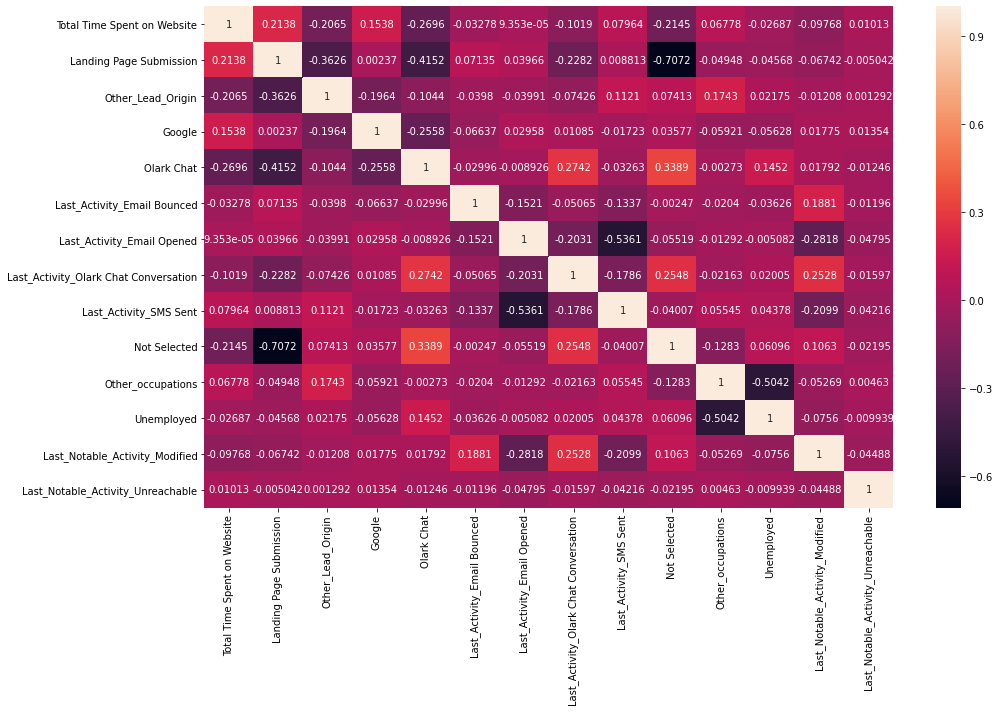

In [119]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(15,10), facecolor='w', edgecolor='k')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, fmt='.4g')

plt.tight_layout()
plt.show()

## <font color='green'>Observations:

- A heat map consisting of the final 14 features proves that there is no significant correlation between the independent variables.

In [120]:
y_train_pred1 = res.predict(X_train_sm)
y_train_pred1[:10]

8859    0.661904
6588    0.035270
346     0.073460
4976    0.342466
2084    0.345318
8446    0.336815
5236    0.094446
2231    0.309854
169     0.165622
1382    0.223141
dtype: float64

In [121]:
y_train_pred_final1 = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred1.values.reshape(-1)})
y_train_pred_final1['Lead Number'] = y_train.index
y_train_pred_final1.head(10)

,Converted,Converted_prob,Lead Number
0,1,0.661904,8859
1,0,0.035270,6588
2,0,0.073460,346
3,0,0.342466,4976
4,0,0.345318,2084
5,0,0.336815,8446
6,1,0.094446,5236
7,1,0.309854,2231
8,0,0.165622,169
9,0,0.223141,1382


# Performance measurement of models for train data

## Plot the ROC curve on train

In [122]:
from sklearn import metrics

In [123]:
#Compute Receiver operating characteristic
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train_pred_final1.Converted, y_train_pred_final1.Converted_prob)

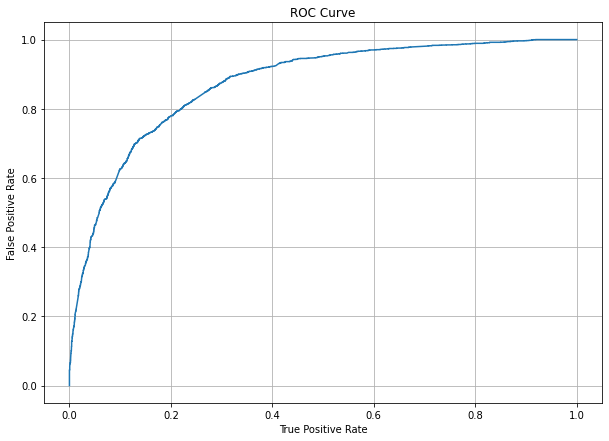

In [124]:
#plotting ROC
plt.figure(figsize=(10,7))
plt.plot(fpr1, tpr1)
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [125]:
#AUC-Score
auc_score = metrics.roc_auc_score(y_train_pred_final1.Converted, y_train_pred_final1.Converted_prob )

In [126]:
print("AUC Score :",auc_score)

AUC Score : 0.8726182590346159


### confusion matrix with predicted and original labels of train data points 

In [127]:
#5_Reference_SampleSolution

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [128]:
#calculating best threshold
from sklearn.metrics import confusion_matrix
print("="*100)
best_t1 = find_best_threshold(thresholds1, fpr1, tpr1)
print("="*100)

train_confusion_matrix1 = confusion_matrix(y_train_pred_final1.Converted, predict_with_best_t(y_train_pred_final1.Converted_prob, best_t1))
train_confusion_matrix_df1 = pd.DataFrame(train_confusion_matrix1)

the maximum value of tpr*(1-fpr) 0.6263453903372389 for threshold 0.37


In [129]:
print("Confusion Matrix for train data set:")
print("="*100)
print(train_confusion_matrix_df1)

Confusion Matrix for train data set:
      0     1
0  2670   785
1   455  1946


In [130]:
y_train_pred_final1['predicted'] = y_train_pred_final1.Converted_prob.map(lambda x: 1 if x > best_t1 else 0)

# Let's see the head
y_train_pred_final1.head()

,Converted,Converted_prob,Lead Number,predicted
0,1,0.661904,8859,1
1,0,0.035270,6588,0
2,0,0.073460,346,0
3,0,0.342466,4976,0
4,0,0.345318,2084,0


$$Accuracy = \frac {True Positive + True Negative} {True Positive + False Positive + True Negative + False Negative}$$

In [131]:
train_acc = metrics.accuracy_score(y_train_pred_final1.Converted, y_train_pred_final1.predicted)
print("Accuracy score of train data: \n",metrics.accuracy_score(y_train_pred_final1.Converted, y_train_pred_final1.predicted))

Accuracy score of train data: 
 0.7880806010928961


In [132]:
#columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final1[i]= y_train_pred_final1.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final1.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.661904,8859,1,1,1,1,1,1,1,1,0,0,0
1,0,0.035270,6588,0,1,0,0,0,0,0,0,0,0,0
2,0,0.073460,346,0,1,0,0,0,0,0,0,0,0,0
3,0,0.342466,4976,0,1,1,1,1,0,0,0,0,0,0
4,0,0.345318,2084,0,1,1,1,1,0,0,0,0,0,0


In [133]:
#calculating accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final1.Converted, y_train_pred_final1[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print("="*100)
print(cutoff_df)
print("="*100)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.410007     1.000000     0.000000
0.1          0.1  0.618511     0.972928     0.372214
0.2          0.2  0.729679     0.924198     0.594501
0.3          0.3  0.771516     0.876718     0.698408
0.4          0.4  0.789959     0.785090     0.793343
0.5          0.5  0.800205     0.714286     0.859913
0.6          0.6  0.788593     0.635985     0.894645
0.7          0.7  0.766393     0.522699     0.935745
0.8          0.8  0.724044     0.380675     0.962663
0.9          0.9  0.667691     0.205748     0.988712


<Figure size 720x504 with 0 Axes>

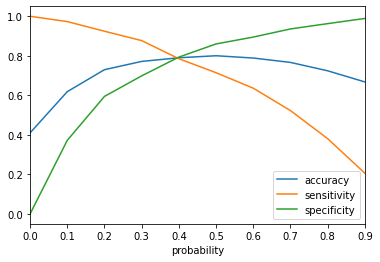

In [134]:
#accuracy, sensitivity and specificity for various probabilities.
plt.figure(figsize=(10,7))
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [135]:
y_train_pred_final1['final_predicted'] = y_train_pred_final1.Converted_prob.map( lambda x: 1 if x > best_t1 else 0)

y_train_pred_final1.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.661904,8859,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.035270,6588,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.073460,346,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.342466,4976,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.345318,2084,0,1,1,1,1,0,0,0,0,0,0,0


In [136]:
y_train_pred_final1['Lead_Score'] = y_train_pred_final1.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final1.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.661904,8859,1,1,1,1,1,1,1,1,0,0,0,1,66
1,0,0.035270,6588,0,1,0,0,0,0,0,0,0,0,0,0,4
2,0,0.073460,346,0,1,0,0,0,0,0,0,0,0,0,0,7
3,0,0.342466,4976,0,1,1,1,1,0,0,0,0,0,0,0,34
4,0,0.345318,2084,0,1,1,1,1,0,0,0,0,0,0,0,35


In [137]:
TP = train_confusion_matrix1[1,1] # true positive 
TN = train_confusion_matrix1[0,0] # true negative
FP = train_confusion_matrix1[0,1] # false positive
FN = train_confusion_matrix1[1,0] # false negative

In [138]:
#sensitivity
train_sens = TP / float(TP+FN)
print("="*100)
print("sensitivity of train data:\n",(TP / float(TP+FN)))
print("="*100)

sensitivity of train data:
 0.8104956268221575


In [139]:
#specificity
train_spec = TN / float(TN+FP)
print("="*100)
print("Specificity of train data:\n",(TN / float(TN+FP)))
print("="*100)

Specificity of train data:
 0.7727930535455861


In [140]:
#True Positive rate
train_tpr = TP/(TP+FN)
print("True positive rate :\n",train_tpr)

True positive rate :
 0.8104956268221575


In [141]:
#False Positive rate 
train_fpr = FP/(FP+TP)
print("False positive rate :\n",train_fpr)

False positive rate :
 0.2874404979860857


## Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances

In [142]:
#Precision
precision = TP/(TP+FP)
print("Precision:\n", (TP/(TP+FP)))

Precision:
 0.7125595020139143


## Recall (also known as sensitivity) is the fraction of the total amount of relevant instances that were actually retrieved

In [143]:
#recall
recall = TP/(TP+FN)
print("Recall:\n", (TP/(TP+FN)))

Recall:
 0.8104956268221575


$$F1 Score = \frac {precision * recall} {precision + recall}$$

In [144]:
F1_Score = 2 * ((precision*recall)/(precision+recall))
print("F1-Score : ",F1_Score)

F1-Score :  0.7583787996882307


# <font color='purple'>=============================================================

# Making Predictions on Test Set

In [145]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Other_Lead_Origin,Google,Olark Chat,Organic Search,Other_Lead_Source,Reference,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Other_Last_Activity,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Not Selected,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Other_occupations,Unemployed,matter_choosing_course_other,Last_Notable_Activity_Email Bounced,Last_Notable_Activity_Email Link Clicked,Last_Notable_Activity_Email Marked Spam,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Email Received,Last_Notable_Activity_Form Submitted on Website,Last_Notable_Activity_Had a Phone Conversation,Last_Notable_Activity_Modified,Last_Notable_Activity_Olark Chat Conversation,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_Resubscribed to emails,Last_Notable_Activity_SMS Sent,Last_Notable_Activity_Unreachable,Last_Notable_Activity_Unsubscribed,Last_Notable_Activity_View in browser link Clicked
5753,-0.469128,1.205998,-0.287889,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8619,3.951964,-0.482859,1.645068,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5151,0.083509,-0.936500,0.678589,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5124,-0.469128,-0.123954,-0.287889,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
687,1.465100,-0.295208,0.195350,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [146]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Landing Page Submission,Other_Lead_Origin,Google,Olark Chat,Last_Activity_Email Bounced,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Not Selected,Other_occupations,Unemployed,Last_Notable_Activity_Modified,Last_Notable_Activity_Unreachable
5753,1.205998,1,0,0,0,0,0,0,1,0,0,1,0,0
8619,-0.482859,1,0,0,0,0,0,0,1,0,0,1,0,0
5151,-0.936500,1,0,0,0,0,1,0,0,0,0,0,1,0
5124,-0.123954,1,0,0,0,0,0,0,1,0,0,1,0,0
687,-0.295208,0,0,0,0,0,1,0,0,1,0,0,0,0


In [147]:
X_test_sm = sm.add_constant(X_test)

In [148]:
y_test_pred = res.predict(X_test_sm)

In [149]:
y_test_pred[:10]

5753    0.801286
8619    0.411668
5151    0.023554
5124    0.503782
687     0.092352
2057    0.089903
9177    0.223978
8429    0.892237
2737    0.129659
1560    0.728858
dtype: float64

In [150]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [151]:
# Let's see the head
y_pred_1.head()

,0
5753,0.801286
8619,0.411668
5151,0.023554
5124,0.503782
687,0.092352


In [152]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [153]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [154]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [155]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [156]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,5753,0.801286
1,0,8619,0.411668
2,0,5151,0.023554
3,0,5124,0.503782
4,0,687,0.092352


In [157]:
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [158]:
y_pred_final = y_pred_final.rename(columns={0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Lead Number,Conversion_Prob
0,0,5753,0.801286
1,0,8619,0.411668
2,0,5151,0.023554
3,0,5124,0.503782
4,0,687,0.092352


## Plot the ROC curve on test

In [159]:
from sklearn.metrics import roc_curve, auc
#Compute Receiver operating characteristic
test_fpr, test_tpr, te_thresholds = roc_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

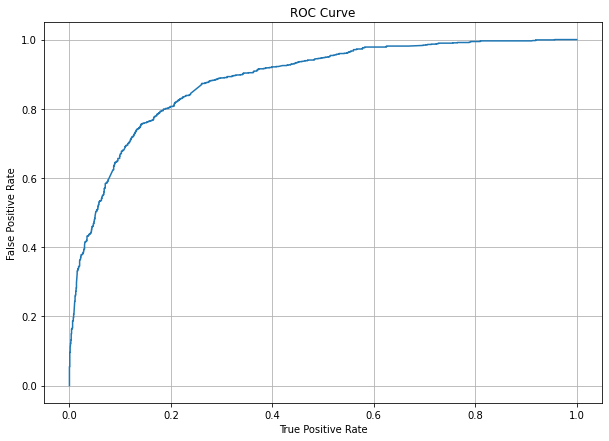

In [160]:
#Plotting ROC for test data
plt.figure(figsize=(10,7))
plt.plot(test_fpr, test_tpr)
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [161]:
#calculating auc_score
auc_score1 = metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Conversion_Prob )

In [162]:
print("AUC Score :", auc_score1)

AUC Score : 0.8838169501437692


In [163]:
y_pred_final['final_predicted'] = y_pred_final['Conversion_Prob'].map(lambda x: 1 if x>best_t1  else 0)
y_pred_final.head(10)

,Converted,Lead Number,Conversion_Prob,final_predicted
0,0,5753,0.801286,1
1,0,8619,0.411668,1
2,0,5151,0.023554,0
3,0,5124,0.503782,1
4,0,687,0.092352,0
5,0,2057,0.089903,0
6,0,9177,0.223978,0
7,1,8429,0.892237,1
8,0,2737,0.129659,0
9,1,1560,0.728858,1


# Performance measurement of models on test data

$$Accuracy = \frac {True Positive + True Negative} {True Positive + False Positive + True Negative + False Negative}$$

In [164]:
test_acc = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print("="*100)
print("Accuracy score for test data:\n",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
print("="*100)

Accuracy score for test data:
 0.801195219123506


## <font color= "green">Observations:
    
- accuracy of teat data for the model is  **80.08 %**

### confusion matrix with predicted and original labels of test data points 

In [165]:
#Confussion matrix
confusion_matrix_test = confusion_matrix(y_pred_final.Converted, predict_with_best_t(y_pred_final.Conversion_Prob, best_t1))
test_confusion_matrix = pd.DataFrame(confusion_matrix_test)

In [166]:
print("="*100)
print("Test confusion matrix")
print("="*100)
print(test_confusion_matrix)

Test confusion matrix
      0    1
0  1127  318
1   181  884


In [167]:
TP1 = confusion_matrix_test[1,1]  # true positive 
TN1 = confusion_matrix_test[0,0]  # true negatives
FP1 = confusion_matrix_test[0,1]  # false positives
FN1 = confusion_matrix_test[1,0]  # false negatives

In [168]:
#Sensitivity of test data
test_sens = TP1/(FN1+TP1)
print("="*100)
print("Sensitivity of test data:",(TP1/(FN1+TP1)))
print("="*100)

Sensitivity of test data: 0.8300469483568075


In [169]:
#Specificity of test data
test_spec = TN1/(TN1+FP1)
print("="*100)
print("Specificity of test data: ",(TN1/(TN1+FP1)))
print("="*100)

Specificity of test data:  0.7799307958477508


In [170]:
#calculating precision of test data
precision1 = TP1/(TP1+FP1)
print("Precision of test data:\n", (TP1/(TP1+FP1)))

Precision of test data:
 0.7354409317803661


In [171]:
#calculating recall of test data
recall1 = TP1/(TP1+FN1)
print("Recall of test data:\n", (TP1/(TP1+FN1)))

Recall of test data:
 0.8300469483568075


In [172]:
#calculating F1_ Score of teat data
F1_Score1 = 2 * ((precision1*recall1)/(precision1+recall1))
print("F1-Score : ",F1_Score1)

F1-Score :  0.7798853109836789


In [173]:
#calculating True Positive Rate
test_tpr = TP1/(TP1+FN1)
print("True positive rate :\n",test_tpr)

True positive rate :
 0.8300469483568075


In [174]:
#Calculating False Positive Rate
test_fpr = FP1/(FP1+TP1)
print("False positive rate :\n",test_fpr)

False positive rate :
 0.26455906821963393


# Feature Selection

In [175]:
#ref : Stack overflow
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website              1.04
Landing Page Submission                 -0.84
Other_Lead_Origin                        2.94
Google                                   0.29
Olark Chat                               1.32
Last_Activity_Email Bounced             -1.14
Last_Activity_Email Opened               0.35
Last_Activity_Olark Chat Conversation   -0.63
Last_Activity_SMS Sent                   1.48
Not Selected                            -0.81
Other_occupations                        2.41
Unemployed                               1.02
Last_Notable_Activity_Modified          -0.75
Last_Notable_Activity_Unreachable        2.11
dtype: float64

In [176]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website              35.22
Landing Page Submission                 -28.48
Other_Lead_Origin                       100.00
Google                                    9.72
Olark Chat                               44.87
Last_Activity_Email Bounced             -38.85
Last_Activity_Email Opened               11.84
Last_Activity_Olark Chat Conversation   -21.40
Last_Activity_SMS Sent                   50.13
Not Selected                            -27.63
Other_occupations                        81.78
Unemployed                               34.65
Last_Notable_Activity_Modified          -25.45
Last_Notable_Activity_Unreachable        71.80
dtype: float64

In [177]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website               5
Landing Page Submission                   1
Other_Lead_Origin                         9
Google                                   12
Olark Chat                                7
Last_Activity_Email Bounced               3
Last_Activity_Email Opened                6
Last_Activity_Olark Chat Conversation    11
Last_Activity_SMS Sent                    0
Not Selected                              4
Other_occupations                         8
Unemployed                               13
Last_Notable_Activity_Modified           10
Last_Notable_Activity_Unreachable         2
dtype: int64

<Figure size 1080x720 with 0 Axes>

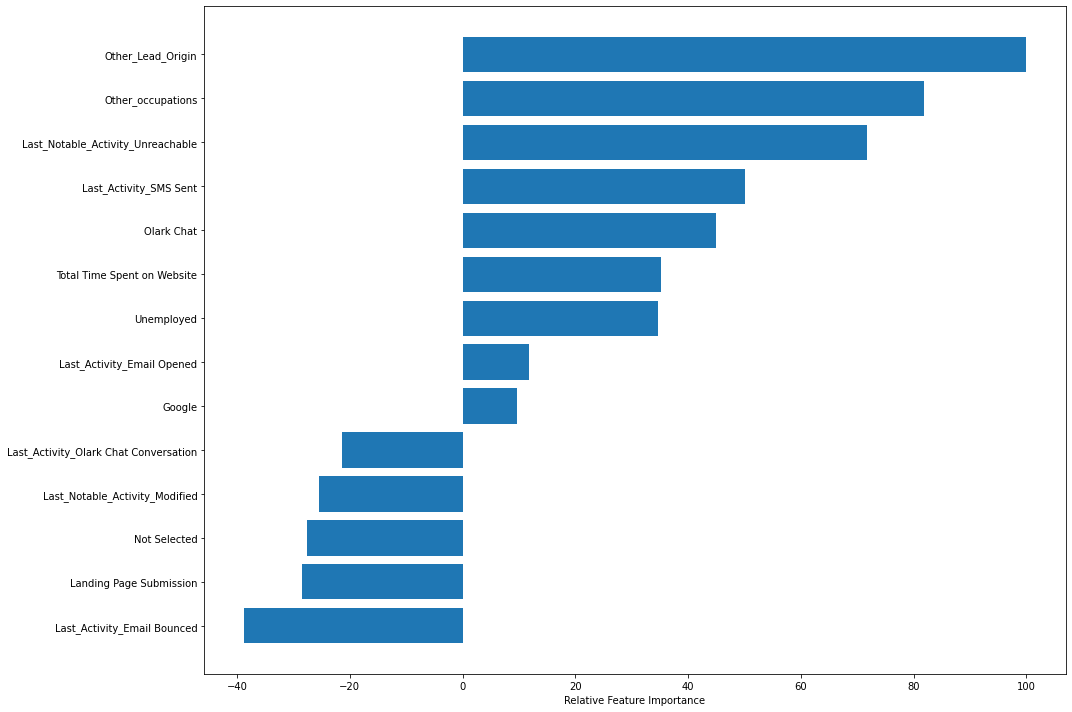

In [178]:
#Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (15,10))
pos = np.arange(sorted_idx.shape[0])

featfig = plt.figure(figsize=(15,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx])
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx])
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

# <font color='purple'>=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=



#  Summary

In [179]:
from prettytable import PrettyTable

summary = PrettyTable()

summary.field_names = ["Data Set", "Threshold", "Accuracy", "Sensitivity","Specificity","Precision","Recall","F1-Score","tpr","fpr","AUC"]
summary.add_row(["train", round(best_t1,3),round(train_acc,3),round(train_sens,3),round(train_spec,3),round(precision,3),
                 round(recall,3),round(F1_Score,3),round(train_tpr,3),round(train_fpr,3),round(auc_score,3)])
summary.add_row(["test", round(best_t1,3),round(test_acc,3),round(test_sens,3),round(test_spec,3),round(precision1,3),
                 round(recall1,3),round(F1_Score1,3),round(train_tpr,3),round(test_fpr,3),round(auc_score1,3)])
print(summary)

+----------+-----------+----------+-------------+-------------+-----------+--------+----------+------+-------+-------+
| Data Set | Threshold | Accuracy | Sensitivity | Specificity | Precision | Recall | F1-Score | tpr  |  fpr  |  AUC  |
+----------+-----------+----------+-------------+-------------+-----------+--------+----------+------+-------+-------+
|  train   |    0.37   |  0.788   |     0.81    |    0.773    |   0.713   |  0.81  |  0.758   | 0.81 | 0.287 | 0.873 |
|   test   |    0.37   |  0.801   |     0.83    |     0.78    |   0.735   |  0.83  |   0.78   | 0.81 | 0.265 | 0.884 |
+----------+-----------+----------+-------------+-------------+-----------+--------+----------+------+-------+-------+


# Variables which highly contributes most toward the probability of a lead getting converted 

- **`Other_Lead_Origin`**
- **`Other_occupations`**
- **`Last_Notable_Activity_Unreachable`**
- **`Olark Chat`**
- **`Last_Activity_SMS Sent`**
- **`Total Time Spent on Website`**
- **`Unemployed`**
- **`Google`**

# Conversion probability of a lead increases with decrease in values  for following variables 

- **`Last_Activity_Email Bounced`**
- **`Last_Notable_Activity_Modified`**
- **`Last_Activity_Olark Chat Conversation`**
- **`Landing Page Submission`**
- **`Not Selected`**
- **`Last_Notable_Activity_Email Opened`**